## Practice - Map two lists into a dictionary in Python

In [8]:
import timeit

keys = ('name', 'age', 'food')
values = ('Monty', 42, 'spam')

dic = {k:v for k,v in zip(keys, values)}
print(dic)  
dict = {keys[i]: values[i] for i in range(len(keys))}
print(dict)

print(min(timeit.repeat(lambda: {k: v for k, v in zip(keys, values)})))

print(min(timeit.repeat(lambda: {keys[i]: values[i] for i in range(len(keys))})))


{'food': 'spam', 'name': 'Monty', 'age': 42}
{'food': 'spam', 'name': 'Monty', 'age': 42}
2.983334730338157
4.199671048129943


## Practice - Python's zip, map, and lambda

* Assume that you've got two collections of values and you need to keep the largest (or smallest) from each. 
* These could be metrics from two different systems, stock quotes from two different services, or just about anything. 

In [9]:
#procedurally
a = [1, 2, 3, 4, 5]
b = [2, 2, 9, 0, 9]

def pick_the_largest(a, b):
    result = []  # A list of the largest values

    # Assume both lists are the same length
    list_length = len(a)
    for i in range(list_length):
        result.append(max(a[i], b[i]))
    return result

print(pick_the_largest(a, b))

[2, 2, 9, 4, 9]


In [5]:
# functional 
a = [1, 2, 3, 4, 5]
b = [2, 2, 9, 0, 9]
[list(map(lambda pair: max(pair), zip(a, b)))]
[*map(lambda pair: max(pair), zip(a, b))]

[2, 2, 9, 4, 9]

## Pi Calculation

![alt text](images/Pi1.png "Title")
![alt text](images/Pi2.png "Title")

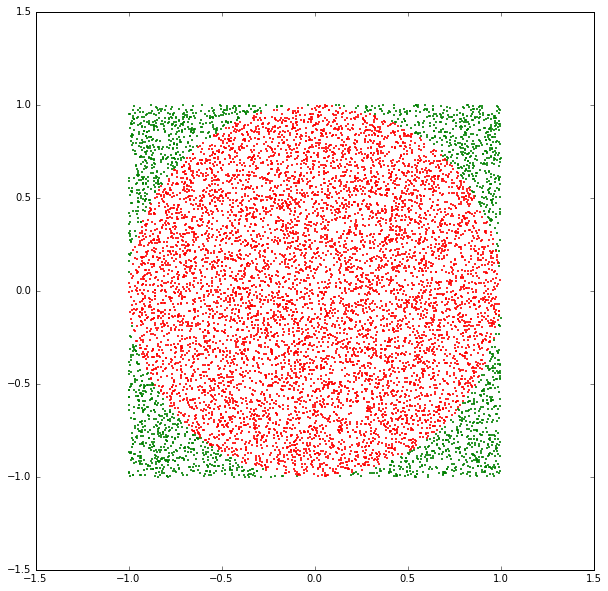

In [21]:
#matplot 
import random
import matplotlib.pyplot as plt
NUM_POINTS = 10000

# Randomly generate points (x[i], y[i]) such that -1 <= x[i] = 1 and -1 <= y[i] <= 1.
x = [random.uniform(-1,1) for i in range(NUM_POINTS)]
y = [random.uniform(-1,1) for i in range(NUM_POINTS)]

circle_x = []
circle_y = []

outsiders_x = []
outsiders_y = []

# Determine which points are inside the circle (and for visualization purposes, also
# determine which are outside the circle).
for i in range(NUM_POINTS):
    if x[i]**2 + y[i]**2 <= 1:
        circle_x.append(x[i])
        circle_y.append(y[i])
    else:
        outsiders_x.append(x[i])
        outsiders_y.append(y[i])

# Plot it.
fig = plt.figure()
fig.set_size_inches(10, 10)
_ = plt.scatter(outsiders_x, outsiders_y, s=1, color='green')
_ = plt.scatter(circle_x, circle_y, s=1, color='red')

In [20]:
# Procedural
import random
import time

def in_circle(x, y):
    return x**2 + y**2 <= 1
    
def compute_pi(num_points):
    inside_counter = 0
    for _ in range(num_points):
        if in_circle(random.random(), random.random()):
            inside_counter += 1
    
    return (inside_counter / num_points) * 4

print('Pi = ' , compute_pi(1000000))


Pi =  3.142068


In [22]:
#functional
%matplotlib inline
import math
import random


n = 100000
points = [(random.random(),random.random()) for _ in range(n)]
fMag = lambda point: math.sqrt(point[0]**2 + point[1]**2) <= 1
l = list(map(fMag,points))
l2 = list(filter(lambda x: x,l))
ratio = float(len(l2))/n
pi = 4*ratio
diff = (math.pi-pi)/pi
print(pi)
print(diff)

3.14264
-0.0003332696109662526


In [23]:
#one line
n = 100000

4*float(len(list(filter(lambda x: x,list(map(lambda point: math.sqrt(point[0]**2 + point[1]**2) <= 1,
                    [(random.random(),random.random()) for _ in range(n)]))))))/n

3.13236

## Parctice - matplotlib - Rain drop simulation

In [1]:
#Rain simulation
"""
Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:,0], rain_drops['position'][:,1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:,3] = np.clip(rain_drops['color'][:,3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

## Parctice - guesses a number

In [ ]:
import random

guesses_made = 0

name = input('Hello! What is your name?\n')

number = random.randint(1, 20)
print('Well, {0}, I am thinking of a number between 1 and 20.'.format(name))

while guesses_made < 6:

    guess = int(input('Take a guess: '))

    guesses_made += 1

    if guess < number:
        print('Your guess is too low.')

    if guess > number:
        print('Your guess is too high.')

    if guess == number:
        break

if guess == number:
    print('Good job, {0}! You guessed my number in {1} guesses!'.format(name, guesses_made))
else:
    print('Nope. The number I was thinking of was {0}'.format(number))